In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# for "2. Data Loading"
import pandas as pd

# for "3-1. Feature Generation"
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn.preprocessing import MaxAbsScaler , MinMaxScaler
scaler = MaxAbsScaler()

In [5]:
import numpy as np

회귀분석기반의 주요인변수들을 -1 ~ 1 MaxAbs정규화

In [ ]:
# 경찰서 : 1798.4478 법원 : -3835.8495 병원 : 100.1137 숙박 : -55.4001 초중고 : 153.2371
coef = [1798.4478 , -3835.8495,100.1137, -55.4001,  153.2371]
coef = np.array(coef)

In [ ]:
coef = coef.reshape(5,1)

In [ ]:
scaler_coef = scaler.fit_transform(coef)
scaler_coef

array([[ 0.46885254],
       [-1.        ],
       [ 0.02609949],
       [-0.01444272],
       [ 0.03994867]])

In [ ]:
coef = scaler_coef.round(3)

In [ ]:
path = '/content/drive/MyDrive/데청캠 프로젝트/dataset/시군구별_인프라수_청년수.csv'
df = pd.read_csv(path, encoding='cp949')
df = df.drop(['Unnamed: 0'], axis=1)
df['청년인구'] = df['청년인구'].str.replace(",","")
df['청년인구'] = df['청년인구'].astype('float64')

In [ ]:
df = df.drop([22,0,1])

In [ ]:
df.columns

Index(['시군구', '청년인구', '병원', '사회스포츠', '대학교', '초중고', '공항', '소방서', '경찰서',
       '소형상업시설(음식점_카페_학원_편의점)', '대형상업시설', '숙박시설', '기차역', '행정기관', '법원, 교도소',
       '문화시설_영화/공연/미술관박물관', '버스터미널'],
      dtype='object')

## 회귀분석기반 지수구하기

In [ ]:
df['청년지수'] = df['경찰서'] * coef[0] + df['법원, 교도소'] * coef[1] + df['병원'] * coef[2] + df['숙박시설'] *coef[3] + df['초중고'] * coef[4] 
df['청년지수'] = df['청년지수'] * 2.5

In [ ]:
df.sort_values(by=['청년지수'], axis=0, ascending=False)
#df.to_csv('/content/drive/MyDrive/데청캠 프로젝트/단순청년인프라지수.csv', encoding='cp949')

,시군구,청년인구,병원,사회스포츠,대학교,초중고,공항,소방서,경찰서,소형상업시설(음식점_카페_학원_편의점),대형상업시설,숙박시설,기차역,행정기관,"법원, 교도소",문화시설_영화/공연/미술관박물관,버스터미널,청년지수
23,서울_송파구,143645.0,1215,108.0,1,139.0,0,1,11,8807,46,52,1,29.0,2.0,37.0,0.0,98.9525
21,서울_서초구,81935.0,1279,172.0,1,80.0,0,1,13,8169,29,80,0,20.0,6.0,62.0,3.0,88.5775
15,서울_강서구,136535.0,880,143.0,1,136.0,1,1,11,7638,34,92,1,30.0,0.0,17.0,0.0,80.4775
47,대구_달서구,107479.0,822,180.0,3,191.0,0,1,14,8913,35,101,0,24.0,3.0,15.0,0.0,77.9100
53,인천_남동구,101919.0,745,111.0,0,155.0,0,2,12,7520,32,63,5,22.0,0.0,12.0,0.0,75.7900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,인천_강화군,7579.0,87,120.0,1,56.0,0,1,14,1998,2,305,1,14.0,1.0,19.0,1.0,14.4950
25,부산_중구,8049.0,140,15.0,0,14.0,0,1,6,2058,21,125,0,11.0,0.0,21.0,0.0,13.1600
49,인천_중구,28965.0,126,105.0,0,55.0,1,2,7,4362,15,265,0,13.0,0.0,25.0,0.0,12.6225
50,인천_동구,9546.0,90,41.0,1,27.0,0,0,3,990,9,37,4,12.0,0.0,6.0,0.0,10.7725


In [ ]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

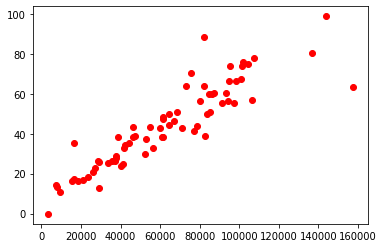

In [ ]:
plt.plot(df['청년인구'], df['청년지수'], 'ro')

## 예측 모델


In [ ]:
# !pip install catboost
# !pip install pycaret
# !pip install optuna # 하이퍼 파라미터

In [ ]:
from sklearn.preprocessing import StandardScaler

# for "4. Modeling with Pycaret"
from pycaret.regression import *

# for "5. Modeling with CatBoostRegressor"
from catboost import CatBoostRegressor
import optuna
from optuna import Trial
from optuna.samplers import TPESampler
from sklearn.metrics import mean_absolute_error

ModuleNotFoundError: ignored

In [6]:
path = '/content/drive/MyDrive/데청캠 프로젝트/dataset/시군구별_인프라수_청년수.csv'
df = pd.read_csv(path, encoding='cp949')
df = df.drop(['Unnamed: 0'], axis=1)
df['청년인구'] = df['청년인구'].str.replace(",","")
df['청년인구'] = df['청년인구'].astype('float64')
df = df.drop([22,0,1])

In [7]:
need_list = [ '경찰서', '법원, 교도소','병원',  '숙박시설','초중고']
need_list2 = ['경찰서', '법원교도소','병원',  '숙박시설','초중고']

In [8]:
X = df[need_list]
y = df['청년인구']
df_data = pd.concat([y,X] , axis=1)

In [9]:
df_data = df_data.astype('float64')

In [10]:
std_scaler = StandardScaler()

In [11]:
df_data.loc[:,need_list] = std_scaler.fit_transform(df_data[need_list])
df_data.columns = ['청년인구',	'경찰서', '법원교도소','병원',  '숙박시설','초중고']
X = df_data[need_list2]
y = df_data['청년인구']

In [ ]:
reg = setup(df_data, 
            preprocess = False, # True로 설정되면, 자체적인 Feature Engineering을 추가로 진행해 Predict가 불가능해진다.
            train_size = 0.999,  # 우리는 전체 데이터를 학습해 test를 예측하는게 목표이기 때문에, 0.999로 설정한다.
            target = '청년인구', 
            silent = True, # 엔터를 누르기 귀찮다. 궁금하면 풀어보세요
            use_gpu = False, # GPU가 있으면 사용하세요 (Cat BOost 속도 향상)
            numeric_features=list(df_data.drop(columns = ['청년인구']).columns), # 모든 변수가 숫자로써의 의미가 있다.
            session_id = 2021,
            fold_shuffle = True
            )

,Description,Value
0,session_id,2021
1,Target,청년인구
2,Original Data,"(72, 6)"
3,Missing Values,False
4,Numeric Features,5
5,Categorical Features,0
6,Transformed Train Set,"(71, 5)"
7,Transformed Test Set,"(1, 5)"
8,Shuffle Train-Test,True
9,Stratify Train-Test,False


In [ ]:
top5 = compare_models(n_select = 5, sort = 'MAE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,10303.9875,2.294686e+08,13937.6024,0.7031,0.2893,0.2809,0.023
llar,Lasso Least Angle Regression,10829.8079,2.342462e+08,14220.3719,0.6979,0.2894,0.2904,0.016
lasso,Lasso Regression,10830.9103,2.342289e+08,14220.3314,0.6979,0.2895,0.2905,0.017
lar,Least Angle Regression,10831.0643,2.342256e+08,14220.2948,0.6979,0.2895,0.2905,0.018
lr,Linear Regression,10831.0661,2.342257e+08,14220.2956,0.6979,0.2895,0.2905,0.015
ridge,Ridge Regression,10837.5551,2.336926e+08,14198.1848,0.7006,0.2887,0.2906,0.015
br,Bayesian Ridge,10857.3512,2.338915e+08,14207.9939,0.7011,0.2897,0.2919,0.017
et,Extra Trees Regressor,12182.1499,2.903084e+08,16050.7743,0.6432,0.3101,0.2946,0.395
catboost,CatBoost Regressor,12243.9285,2.679931e+08,15333.0567,0.7116,0.3531,0.3383,0.498
knn,K Neighbors Regressor,12276.1792,2.863645e+08,16006.2649,0.6758,0.3720,0.3892,0.064


In [ ]:
models = []
for m in top5:
    models.append(tune_model(m, 
                             optimize = 'MAE', 
                             choose_better = True,
                            n_iter = 10))

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,13016.3887,2.037882e+08,14275.4395,0.5868,0.2384,0.2182
1,7512.1499,8.048373e+07,8971.2725,0.9086,0.1574,0.1392
2,9331.0986,1.244154e+08,11154.1641,0.7615,0.1744,0.1528
3,14288.8750,4.378925e+08,20925.8828,-0.0022,0.2377,0.1592
4,8408.6143,1.683855e+08,12976.3418,0.8784,0.3175,0.2759
5,7950.4663,8.259672e+07,9088.2734,0.8752,0.1531,0.1503
6,11751.6143,2.337810e+08,15289.8984,0.5645,0.4438,0.4068
7,7755.8193,8.056902e+07,8976.0254,0.8215,0.1648,0.1562
8,17333.6152,7.636296e+08,27633.8496,0.6619,0.4850,0.7191
9,10961.9980,1.667145e+08,12911.7959,0.9230,0.5232,0.5276


In [ ]:
voting = blend_models(models, optimize = 'MAE')
voting = tune_model(voting, 
                 optimize = 'MAE', 
                 choose_better = True,
                 n_iter = 30)

voting = finalize_model(voting)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,12354.1047,1.751366e+08,13233.9185,0.6449,0.2287,0.2091
1,7448.5397,8.309842e+07,9115.8335,0.9056,0.1600,0.1384
2,8895.9349,1.216689e+08,11030.3635,0.7668,0.1706,0.1450
3,14696.8858,4.592947e+08,21431.1621,-0.0512,0.2379,0.1632
4,7812.6813,1.530372e+08,12370.8205,0.8895,0.3275,0.2832
5,7742.7789,8.242556e+07,9078.8521,0.8755,0.1508,0.1438
6,11469.5916,2.295748e+08,15151.7258,0.5723,0.4402,0.3973
7,7295.3236,7.395271e+07,8599.5760,0.8362,0.1535,0.1434
8,17272.5357,7.599057e+08,27566.3870,0.6635,0.4968,0.7250
9,10585.6722,1.696387e+08,13024.5430,0.9217,0.5153,0.5113


In [ ]:
voting.weights

[0.8300000000000001,
 0.29000000000000004,
 0.9400000000000001,
 0.19,
 0.09999999999999999]

In [ ]:
layer1_pred = voting.predict(df_data.drop(columns = ['청년인구']))
layer1_pred

array([ 39072.53650165,  65253.83401898,  78862.64975728,  80177.09207697,
        71247.9800549 ,  82050.54227061,  60217.64572299,  52550.03523848,
       109714.14450801,  96290.8650496 ,  60218.09886067,  84031.97904768,
        84644.57371666, 117331.79023343,  70919.96346022,  46197.47733418,
        94569.54919126,  78667.00605495,  90661.73726646, 113496.00946145,
       139576.47007738, 105895.61507851,  15942.41512923,  21354.39329236,
        21342.3647942 ,  23631.36071897, 102207.90208445,  62364.37664757,
        55460.25146638,  54248.45783708,  72031.89543948,  63518.86612966,
        50976.06656612,  21092.82414685,  30304.71868071,  35850.57560035,
        31934.7836387 ,  32676.10614899,  48225.72146675,  69331.63686404,
        36167.13025216,  36353.50066637,  89416.94269125,  87146.0419144 ,
       110423.54062737,  53696.4992856 ,  17357.20110557,  13499.01489907,
        50682.88968708,  60845.36787288, 111657.38344609, 100075.08818578,
        55433.54054197,  

In [ ]:
df_data['청년인구']

2     52554.0
3     67271.0
4     91126.0
5     80217.0
6     83722.0
       ...   
70    64670.0
71    26280.0
72    41455.0
73    37605.0
74    64602.0
Name: 청년인구, Length: 72, dtype: float64

In [ ]:
voting.score(X,y)

0.8300148369855345

## Lasso


In [12]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

In [13]:
lasso = Lasso(alpha = 0.1)
lasso.fit(X,y)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [14]:
lasso.score(X,y)

0.8309748180466892

In [19]:
coef = lasso.coef_
coef

array([ 1.4550259 , -2.40446748,  7.76603109, -1.08038833,  2.92427724])

In [20]:
#coef /= 3000

In [23]:
path = '/content/drive/MyDrive/데청캠 프로젝트/dataset/시군구별_인프라수_청년수.csv'
df = pd.read_csv(path, encoding='cp949')
df = df.drop(['Unnamed: 0'], axis=1)
df['청년인구'] = df['청년인구'].str.replace(",","")
df['청년인구'] = df['청년인구'].astype('float64')
df = df.drop([22,0,1])

In [24]:
df['청년인프라지수'] = df[need_list[0]] * coef[0] + df[need_list[1]] * coef[1] + df[need_list[2]] * coef[2] + df[need_list[3]] * coef[3] + df[need_list[4]] * coef[4]
#df['청년인프라지수'] /= 100
df.sort_values(by=['청년인프라지수'], axis=0, ascending=False)

,시군구,청년인구,병원,사회스포츠,대학교,초중고,공항,소방서,경찰서,소형상업시설(음식점_카페_학원_편의점),대형상업시설,숙박시설,기차역,행정기관,"법원, 교도소",문화시설_영화/공연/미술관박물관,버스터미널,청년인프라지수
21,서울_서초구,81935.0,1279,172.0,1,80.0,0,1,13,8169,29,80,0,20.0,6.0,62.0,3.0,10084.753404
23,서울_송파구,143645.0,1215,108.0,1,139.0,0,1,11,8807,46,52,1,29.0,2.0,37.0,0.0,9797.218463
66,대전_서구,104642.0,896,66.0,3,165.0,0,2,11,9410,42,79,2,25.0,4.0,29.0,2.0,7361.906334
15,서울_강서구,136535.0,880,143.0,1,136.0,1,1,11,7638,34,92,1,30.0,0.0,17.0,0.0,7148.418619
47,대구_달서구,107479.0,822,180.0,3,191.0,0,1,14,8913,35,101,0,24.0,3.0,15.0,0.0,6846.252244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,부산_중구,8049.0,140,15.0,0,14.0,0,1,6,2058,21,125,0,11.0,0.0,21.0,0.0,1001.865848
49,인천_중구,28965.0,126,105.0,0,55.0,1,2,7,4362,15,265,0,13.0,0.0,25.0,0.0,863.237439
50,인천_동구,9546.0,90,41.0,1,27.0,0,0,3,990,9,37,4,12.0,0.0,6.0,0.0,742.288993
57,인천_강화군,7579.0,87,120.0,1,56.0,0,1,14,1998,2,305,1,14.0,1.0,19.0,1.0,527.851684


In [25]:
df.to_csv('/content/drive/MyDrive/데청캠 프로젝트/단순인프라지수.csv', encoding='cp949')

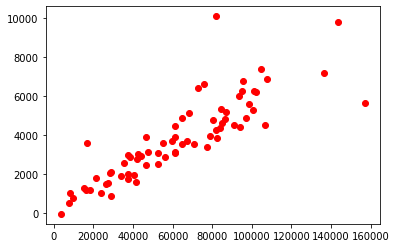

In [26]:
plt.plot(df['청년인구'], df['청년인프라지수'], 'ro')

In [27]:
df['청년인프라지수'] = df['청년인구'] / df['청년인프라지수'] / 3.3

In [28]:
df['청년인프라지수'].mean()

4.810657510195664

In [29]:
df.sort_values(by=['청년인프라지수'], axis=0, ascending=False)

,시군구,청년인구,병원,사회스포츠,대학교,초중고,공항,소방서,경찰서,소형상업시설(음식점_카페_학원_편의점),대형상업시설,숙박시설,기차역,행정기관,"법원, 교도소",문화시설_영화/공연/미술관박물관,버스터미널,청년인프라지수
49,인천_중구,28965.0,126,105.0,0,55.0,1,2,7,4362,15,265,0,13.0,0.0,25.0,0.0,10.167855
20,서울_관악구,157264.0,706,140.0,1,91.0,0,1,10,6461,27,98,0,23.0,0.0,17.0,0.0,8.423318
72,울산_북구,41455.0,172,30.0,0,94.0,1,1,5,3492,11,52,2,9.0,0.0,9.0,0.0,8.043699
56,인천_서구,106515.0,524,137.0,0,166.0,0,1,7,7403,15,62,6,25.0,0.0,13.0,0.0,7.175866
36,부산_강서구,23640.0,113,121.0,0,59.0,1,1,10,2951,7,52,0,10.0,2.0,6.0,0.0,7.137549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,대구_수성구,72909.0,786,110.0,1,122.0,0,1,9,7919,26,72,2,25.0,3.0,26.0,0.0,3.458098
21,서울_서초구,81935.0,1279,172.0,1,80.0,0,1,13,8169,29,80,0,20.0,6.0,62.0,3.0,2.462012
25,부산_중구,8049.0,140,15.0,0,14.0,0,1,6,2058,21,125,0,11.0,0.0,21.0,0.0,2.434548
41,대구_중구,16533.0,460,37.0,0,31.0,0,1,5,4209,31,102,0,15.0,0.0,48.0,0.0,1.407263


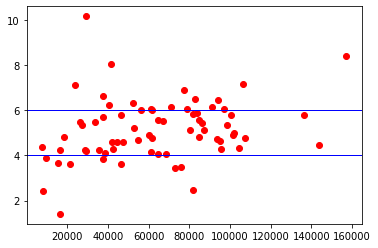

In [30]:
df = df.drop([58])
plt.plot(df['청년인구'], df['청년인프라지수'], 'ro')
plt.axhline(y=6, color='b', linewidth=1)
plt.axhline(y=4, color='b', linewidth=1)

In [31]:
df['청년인프라지수'].mean()

5.139867783894123

In [32]:
df[df['시군구']=='세종시']['청년인프라지수']

74    5.556882
Name: 청년인프라지수, dtype: float64

In [ ]:
df.to_csv('/content/drive/MyDrive/데청캠 프로젝트/회귀분석_Lasso기반 청년인프라지수.csv', encoding='cp949')

In [ ]:
#   %%shell
#  jupyter nbconvert --to html /content/청년인프라지수3.ipynb

In [ ]:
df[df['청년인프라지수']  <6]

,시군구,청년인구,병원,사회스포츠,대학교,초중고,공항,소방서,경찰서,소형상업시설(음식점_카페_학원_편의점),대형상업시설,숙박시설,기차역,행정기관,"법원, 교도소",문화시설_영화/공연/미술관박물관,버스터미널,청년인프라지수


In [ ]:
pred = lasso.predict(X)
y_set = y

In [ ]:
MSE = ((y_set - pred)**2).sum()/len(y_set)
MSE

189354998.11027727

In [ ]:
RMSE = np.sqrt(MSE)
RMSE

13760.632184252192

In [ ]:
lasso.score(X,y)

0.8309748180466893

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=lasso, # 학습된 모델
                         X=X, 
                         y=y,
                         scoring="neg_mean_squared_error",
                         cv=5)

rmse_scores = np.sqrt(-scores)

In [ ]:
def display_scores(scores):
    print("점수:", scores)
    print("평균:", scores.mean())
    print("표준 편차:", scores.std())

In [ ]:
display_scores(rmse_scores)

점수: [14686.57629511 23534.88495867 12991.9598505  14668.55464367
 11759.05253707]
평균: 15528.205657004204
표준 편차: 4151.946804085108
